In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc

In [3]:
#parametros de espacio
Lx = 10             # longitud de la cadena
dxe = 0.01          # longitud de un elemento
Nx = int(Lx/dxe)    # numero de elementos

# parametros de tiempo
T = 10              # tiempo total 
dt = 0.01           # paso de tiempo 
Nt = int(T/dt)      # numero de pasos de tiempo

#Numero de Courant de estabilidad
C = 1               # c dt/dx; c = velocidad de la onda

In [5]:
xmesh = np.linspace(0, Lx, Nx)      # x-discretización
tmesh = np.linspace(0, T, Nt)       # t-discretización


# matriz de desplazamiento discretizada en espacio y tiempo
u = np.zeros((Nt, Nx))


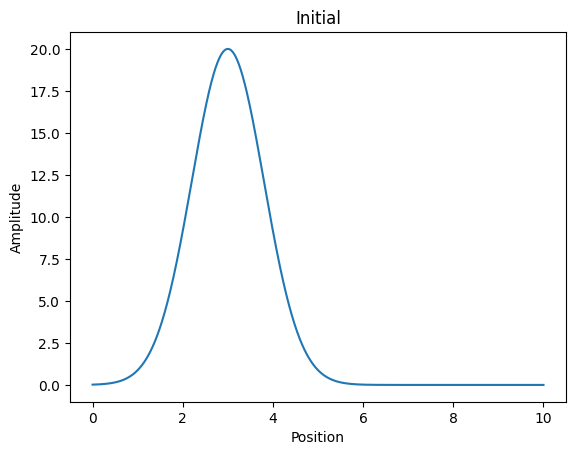

In [12]:
mu = 3    # media
sig = 0.8 # desviación estandar

u[0,:] = 20*np.exp(-np.power(xmesh - mu, 2.) / (2 * np.power(sig, 2.)))
u[1,:] = u[0,:]

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(xmesh, u[0,:])
ax.set_xlabel("Position")
ax.set_ylabel("Amplitude")
ax.set_title("Initial")

plt.show()

In [13]:
t = 0
for t in range(1, Nt-1):
    
    # Inner points: central difference scheme
    for x in range(1, Nx-1):
        u[t+1,x] = 2*u[t,x] - u[t-1,x] + C*C*(u[t,x+1] - 2*u[t,x] + u[t,x-1])
            
    # Boundary conditions
    u[t+1,0] = 0; u[t+1,Lx-1] = 0

MovieWriter imagemagick unavailable; using Pillow instead.


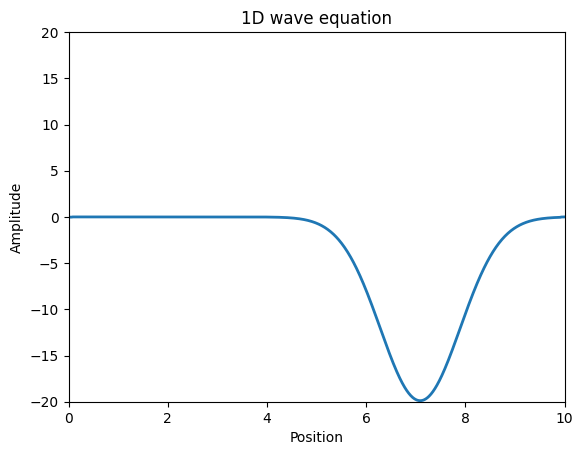

In [14]:
fig = plt.figure()
ax = plt.axes(xlim=(0, 10), ylim=(-20, 20))
ax.set_xlabel("Position")
ax.set_ylabel("Amplitude")
ax.set_title("1D wave equation")
line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    x = xmesh
    y = u[i,:]
    line.set_data(x, y)
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=Nt, interval=10, blit=True)

anim.save('wave_equation_1D.gif', writer='imagemagick', fps=30)

